# Supervised Learning: Classification Algorithms Introduction

In this practical assignment, we will explore supervised learning, focusing on classification problems. We'll apply different learning algorithms, compare their performance using evaluation metrics, and analyze the time spent to train and test the models.

Key steps include:
1. Dataset analysis and pre-processing.
3. Defining training and test sets.
4. Selecting and parameterizing learning algorithms, choosing at least three from Decision Trees, Neural Networks, K-NN, SVM, etc.
5. Evaluating the learning process on the test set.

We'll use pandas to pre-process the dataset, scikit-learn for implementing algorithms, and seaborn for visualization.

## Dataset

We'll use the [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) from the UCI Machine Learning Repository.

From the dataset description:
> The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

As presented in the slides, we will try to answer some questions:
* Will a particular session lead to a purchase?
* Which features are most/least indicative of a purchase?
* What users are more/less likely to purchase?


## Pre-processing

We'll start by loading the dataset `online_shoppers_intention.csv` using pandas.

In [1]:
import pandas

data = pandas.read_csv('online_shoppers_intention.csv')

# check if there are any null values
print("Any null values? ", data.isnull().values.any())

# check if there are any missing values
print("Any missing values? ", data.isna().values.any())

data.head()

Any null values?  False
Any missing values?  False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Let's try to plot some of the features to get a better understanding of the dataset.

As previously mentioned, we'll use seaborn for visualization. We'll start with a simple correlation bar plot with the target variable `Revenue`.

<Axes: xlabel='Revenue'>

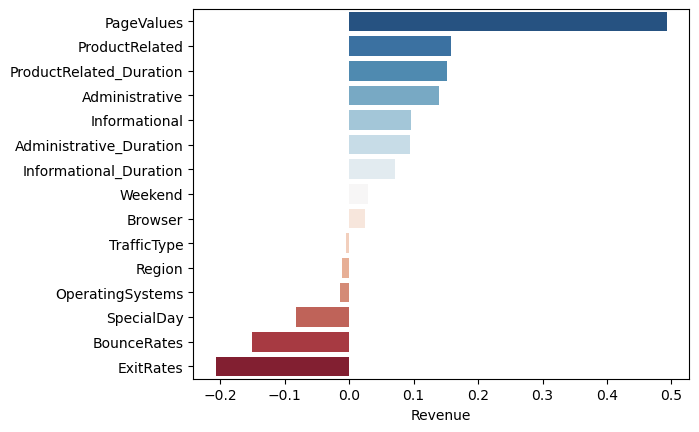

In [65]:
import seaborn
%matplotlib inline


corr_matrix = data.corr(numeric_only=True).sort_values(
    by='Revenue', ascending=False).drop('Revenue', axis=0)

seaborn.barplot(x=corr_matrix['Revenue'],
                y=corr_matrix.index, palette='RdBu_r')